In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import f1_score, accuracy_score, r2_score
from sklearn.model_selection import (train_test_split, learning_curve, cross_val_score, cross_val_predict, 
ShuffleSplit, KFold, GridSearchCV)
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.stop_words import ENGLISH_STOP_WORDS
from nltk.corpus import stopwords
# Data Visualization
import matplotlib.pyplot as plt; plt.rcdefaults()
import matplotlib.pyplot as plt
%matplotlib inline
import nltk
import re
import spacy

nlp = spacy.load('en_core_web_sm')
STOPLIST = set(stopwords.words('english') + list(ENGLISH_STOP_WORDS))
#1: unreliable
#0: reliable
train = pd.read_csv(r'TrainDataset.csv', sep=",", engine='python')
print("Old shape of train:", train.shape)
train=train.dropna()

# test = pd.read_csv(r'test.csv', sep=",", engine='python')
# print("Old shape of test:", train.shape)
# test=test.dropna()

def clean_data(dataframe):
   # Remove punctation
    dataframe['text'] = dataframe['text'].str.replace('[^\w\s]',' ')
    # Remove numbers 
    dataframe['text'] = dataframe['text'].str.replace('[^A-Za-z]',' ')
    # Make sure any double-spaces are single 
    dataframe['text'] = dataframe['text'].str.replace('  ',' ')
    dataframe['text'] = dataframe['text'].str.replace('  ',' ')
    # Transform all text to lowercase
    dataframe['text'] = dataframe['text'].str.lower()   
    dataframe.drop_duplicates(subset=['text'], inplace=True)
    print("New shape:", dataframe.shape)
    return dataframe

traindata = clean_data(train)
dataframe = traindata
# testdata = clean_data(test)

Old shape of train: (10000, 5)
New shape: (8657, 5)


In [96]:
# def word_extraction(sentence):
#     global cleaned_text
#     ignore = ['a', "the", "is", "an", "to", "in", "as", "are", "on", "of", "for", "with"]
#     words = re.sub("[^\w]", " ",  sentence).split()
#     cleaned_text = [w.lower() for w in words if w not in ignore]
#     cleaned_text = [w.lower() for w in words if w not in STOPLIST]
#     return cleaned_text    
    
# def generate_bow(allsentences):    
#     bow = []
#     for sentence in allsentences:
#         words = word_extraction(sentence) 
#         if
#         diction = [x.lemma_ for x in [y for y in nlp(str(words)) if not y.is_stop and y.pos_ != 'PUNCT']]
#         bow.append(diction)
#     return bow
        
# data_set = generate_bow(dataframe["text"])
# df = pd.DataFrame(data_set)
# df['News'] = df[df.columns[0:]].apply(lambda x: ' '.join(x.dropna().astype(str)), axis=1)
# df["Type"] = dataframe["label"]
# dfModel = pd.DataFrame(df[["News", "Type"]])
# dfModel = dfModel.dropna()

In [88]:
# # # Create a DataFrame to check nulls
# # pd.DataFrame([dataframe_train.isnull().sum(),dataframe_test.isnull().sum()], index=["TheTraining","TheTesting"]).T
# print(dataframe.set_index(["TypeName","Type"]).count(level="Type"))

In [3]:
X = dataframe.text.values + dataframe.author.values + dataframe.title.values
target = dataframe.label.values

X_train, X_test, y_train, y_test = train_test_split(X, target, random_state=0, stratify=target, test_size=0.2)

pipe = Pipeline([('cvec', CountVectorizer(stop_words=ENGLISH_STOP_WORDS)),    
                 ('nb', MultinomialNB())])

# Tune GridSearchCV
pipe_params = {'cvec__ngram_range': [(1,1), (1,2)],
               'nb__alpha': [.6],
               'cvec__max_df': [0.5, 0.75]}

gs = GridSearchCV(pipe, param_grid=pipe_params, cv=3)
gs.fit(X_train, y_train);

print("Train score", gs.score(X_train, y_train))
print("Test score", gs.score(X_test, y_test))
print("Best score:", gs.best_score_)

KeyboardInterrupt: 

<Figure size 432x288 with 0 Axes>

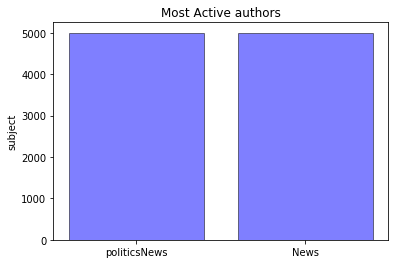

<Figure size 432x288 with 0 Axes>

In [52]:
# # Set x values: # of posts 
# df_onion_authors = train['subject'].value_counts() 
# count = train['subject'].value_counts() 
# df_onion_authors = df_onion_authors[df_onion_authors >5]

# # Set y values: Authors 
# df_onion_authors_index = list(df_onion_authors.index)
# ax = plt.subplot(111)
# ax.bar(df_onion_authors_index, df_onion_authors, align='center', alpha=0.5, color="blue", edgecolor="black"
#        , bottom=None)
# plt.ylabel('subject')
# plt.title('Most Active authors')
# plt.figure()